# **KNN Algorithm Assignment - 1**

Implement a KNN model to classify the animals in to categorie

**Data :** Zoo.csv

## **Importing Necesssary Libraries**

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## **Importing Data**

In [3]:
zoo_data = pd.read_csv('Zoo.csv')
zoo_data.head(50)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


## **Data Understanding**

In [4]:
zoo_data.shape

(101, 18)

In [5]:
zoo_data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [6]:
zoo_data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [7]:
import warnings
warnings.filterwarnings('ignore')

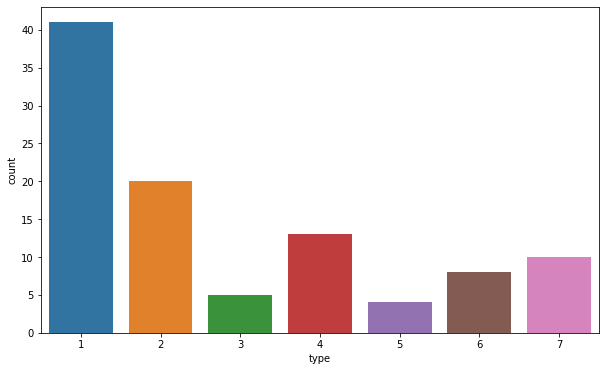

In [8]:
plt.figure(figsize = (10,6))
sns.countplot(zoo_data['type'],)
plt.show()

By the above plot we clearly come to know that majority of animals grouped as **Type 1**

In [9]:
zoo_data.groupby(by = 'legs')['type'].value_counts()

legs  type
0     4       13
      7        4
      1        3
      3        3
2     2       20
      1        7
4     1       31
      5        4
      3        2
      7        1
5     7        1
6     6        8
      7        2
8     7        2
Name: type, dtype: int64

In [10]:
zoo_data.groupby(by = 'eggs')['type'].value_counts()

eggs  type
0     1       40
      3        1
      7        1
1     2       20
      4       13
      7        9
      6        8
      3        4
      5        4
      1        1
Name: type, dtype: int64

In [11]:
zoo_data.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [12]:
zoo_data['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [13]:
pd.crosstab(index = zoo_data['milk'], columns = zoo_data['type'])

type,1,2,3,4,5,6,7
milk,,,,,,,
0,0,20,5,13,4,8,10
1,41,0,0,0,0,0,0


In [14]:
pd.crosstab(index = zoo_data['type'], columns = zoo_data['breathes'])

breathes,0,1
type,,
1,0,41
2,0,20
3,1,4
4,13,0
5,0,4
6,0,8
7,7,3


In [15]:
pd.crosstab(index = zoo_data['type'], columns = zoo_data['legs'])

legs,0,2,4,5,6,8
type,,,,,,
1,3,7,31,0,0,0
2,0,20,0,0,0,0
3,3,0,2,0,0,0
4,13,0,0,0,0,0
5,0,0,4,0,0,0
6,0,0,0,0,8,0
7,4,0,1,1,2,2


#### **Observation:**
 All the animals which can breathe and gives milk belongs to type 1 category

Animals which can breathe, don't give milk and has 2 legs belongs to type 2 category

 All the animals which can't breathe and also don't give milk & has no legs belongs to type 4 category


## **Data Preparation**

In [16]:
del zoo_data['animal name']

In [17]:
zoo_data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## **Model Building**

In [18]:
x = zoo_data.drop(labels='type', axis=1)
y = zoo_data[['type']]

In [19]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [20]:
y

,type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,stratify = y)

In [22]:
x_train.shape,x_test.shape

((80, 16), (21, 16))

In [23]:
y_train.shape,y_test.shape

((80, 1), (21, 1))

## **Model Training**

In [68]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Model = KNeighborsClassifier(n_neighbors=3)
KNN_Model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [49]:
from sklearn.model_selection import cross_val_score
neighbours = list(range(1,50))
cv_scores = []

for i in neighbours:
    #print(i)
   KNN_Model = KNeighborsClassifier(n_neighbors = i)
   cv_score = cross_val_score(estimator = KNN_Model,X=x,y=y,cv=10)
    #print(i,'-',cv_score.mean())
   cv_scores.append(cv_score.mean())

In [50]:
 cv_scores

[0.9800000000000001,
 0.9400000000000001,
 0.95,
 0.9200000000000002,
 0.8809090909090909,
 0.8709090909090909,
 0.8418181818181818,
 0.8118181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7718181818181818,
 0.7418181818181818,
 0.7218181818181818,
 0.7027272727272726,
 0.7027272727272726,
 0.7027272727272726,
 0.7027272727272726,
 0.7027272727272726,
 0.7027272727272726,
 0.6927272727272726,
 0.6436363636363637,
 0.5936363636363635,
 0.5936363636363635,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5636363636363637,
 0.5536363636363636,
 0.5436363636363637,
 0.5436363636363637,
 0.5436363636363637,
 0.534

In [51]:
neighbours[cv_scores.index(max(cv_scores))]

1

In [61]:
# Rebuild the Model by choosing 1 as the nearest neighbour
KNN_Model_1 = KNeighborsClassifier(n_neighbors=1)
KNN_Model_1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## **Model Testing**

In [74]:
y_train_pred = KNN_Model_1.predict(x_train)

In [76]:
y_test_pred = KNN_Model_1.predict(x_test)

## **Model Evaluation**

In [82]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

For Train Data

In [83]:
accuracy_score(y_train,y_train_pred)

1.0

For Test Data

In [84]:
accuracy_score(y_test,y_test_pred)

1.0

## **Model Deployement**

In [30]:
from pickle import dump

In [31]:
dump(KNN_Model,open('KNN_Model_pkl','wb'))

In [32]:
from pickle import load

In [58]:
KNN_Model_Pickle = load(open('KNN_Model_pkl','rb'))

In [59]:
pickle_pred = KNN_Model_Pickle.predict(x_test)